In [1]:
import sys
sys.path.append('../src')
sys.path.append('../config')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import load_data as data

In [2]:
data.df_DX_Session.head() 

transaction_id          id_ocpp               location_name  id_pl  \
0       512840826  ParisSaclay30-1  PS 030-1 - IPP - Drahi - X      1   
1       703497342  ParisSaclay30-1  PS 030-1 - IPP - Drahi - X      1   
2       412512340  ParisSaclay30-1  PS 030-1 - IPP - Drahi - X      1   
5       852888750  ParisSaclay30-1  PS 030-1 - IPP - Drahi - X      1   
7       718583992  ParisSaclay30-1  PS 030-1 - IPP - Drahi - X      1   

   start_volume  end_volume  total_volume             startdate  \
0      2275.265    2293.518        18.253  2025-05-30T12:04:57Z   
1      2274.677    2275.181         0.504  2025-05-30T05:42:28Z   
2      2272.276    2274.677         2.401  2025-05-29T22:34:44Z   
5      2264.202    2272.276         8.074  2025-05-29T10:38:30Z   
7      2263.346    2264.202         0.856  2025-05-28T17:00:49Z   

                enddate  duration  authorize      rfid  book_id auth_method  
0  2025-05-30T13:38:43Z      5626  RemoteApp         1      NaN        RFID  
1  2025-05-30T05:44:44Z       136   8E47015B  8E47015B      NaN        RFID  
2  2025-05-29T22:45:24Z       640   8E47015B  8E47015B      NaN        RFID  
5  2025-05-29T11:27:56Z      2966   8E47015B  8E47015B      NaN        RFID  
7  2025-05-29T06:05:31Z     47082   8E47015B  8E47015B      NaN        RFID

In [3]:
data.df_b103_23.head()

Unnamed: 0     CPO GROUP         organisation EMSP EMSP CODE  TVA/Siren  \
0         NaN  total_france  Ecole Polytechnique  G2M       G2M        NaN   
1         NaN  total_france  Ecole Polytechnique  G2M       G2M        NaN   
2         NaN  total_france  Ecole Polytechnique  G2M       G2M        NaN   
3         NaN  total_france  Ecole Polytechnique  G2M       G2M        NaN   
4         NaN  total_france  Ecole Polytechnique  G2M       G2M        NaN   

   session close date  session start time    session end time  \
0 2023-01-02 19:58:02 2023-01-02 08:54:05 2023-01-02 19:57:59   
1 2023-01-02 21:59:45 2023-01-02 17:28:55 2023-01-02 21:59:41   
2 2023-01-03 14:56:39 2023-01-03 06:14:38 2023-01-03 14:56:34   
3 2023-01-03 09:09:23 2023-01-03 09:09:15 2023-01-03 09:09:19   
4 2023-01-03 22:06:05 2023-01-03 09:09:28 2023-01-03 22:06:00   

   consumption (kWh)  ...         Evse Id            eMi3  plug type  \
0             28.623  ...  CU-POLY-BACH-2  FR*TCB*E002028        T2S   
1             14.442  ...  CU-POLY-BACH-7  FR*TCB*E002033        T2S   
2             19.287  ...  CU-POLY-BACH-8  FR*TCB*E002034        T2S   
3              0.000  ...  CU-POLY-BACH-9  FR*TCB*E002035        T2S   
4             13.125  ...  CU-POLY-BACH-9  FR*TCB*E002035        T2S   

                                   uuid compliance  Evse max power (kW)  \
0  0a5005a6-a6ee-4a36-93a1-416c7f5ab851      valid                    7   
1  f86255e9-5cdc-4025-adb9-e9d6f8f992ae      valid                    7   
2  d04d46fa-74f6-4eec-b53c-0c868600d312      valid                    7   
3  768458f3-7124-468b-ac98-9709abdb5247    invalid                    7   
4  808ee361-b204-48e5-8131-1fefe0ec76b2      valid                    7   

   max power (kW) Notification Date idle fee charge amount  
0             7.2               NaN        0             0  
1             3.5               NaN        0             0  
2             7.2               NaN        0             0  
3             0.0               NaN        0             0  
4             3.7               NaN        0             0  

[5 rows x 33 columns]

In [4]:
data.df_cleaned_b103.head()

session close date  session start time    session end time  \
0 2025-05-21 13:20:31 2025-05-21 08:36:01 2025-05-21 13:20:28   
1 2025-05-21 11:19:53 2025-05-21 11:17:08 2025-05-21 11:19:51   
2 2025-05-21 08:08:45 2025-05-21 08:07:23 2025-05-21 08:08:42   
3 2025-05-21 08:07:18 2025-05-21 08:06:14 2025-05-21 08:07:15   
4 2025-05-20 17:30:59 2025-05-20 15:30:20 2025-05-20 17:30:57   

   consumption (kWh) charging start time   charging end time  \
0             13.456 2025-05-21 08:36:01 2025-05-21 13:20:28   
1              0.051 2025-05-21 11:17:10 2025-05-21 11:17:37   
2              0.045 2025-05-21 08:07:23 2025-05-21 08:07:57   
3              0.045 2025-05-21 08:06:14 2025-05-21 08:06:47   
4              1.391 2025-05-20 15:30:22 2025-05-20 17:19:17   

   session duration  charging duration     idTag      Label RFID Evse Id  \
0             285.0              285.0  5207FDDF        Badge 11       4   
1               3.0                1.0  04A60F38         BADGE42       5   
2               2.0                1.0  AA41F1A1         Badge24       3   
3               2.0                1.0  AA41F1A1         Badge24       3   
4             121.0              109.0  74EA193B  polytechnique8       3   

   plug type                                  uuid compliance  max power (kW)  
0  AC-Level2  1a545a81-ecc8-4718-b7ea-da5879685198      ended             7.2  
1  AC-Level2  9858382d-f3bc-4950-8772-d8c72b1caab7     failed             6.9  
2  AC-Level2  121800ab-59b7-49d4-b325-962793af96ce     failed             6.0  
3  AC-Level2  387f2b56-2018-4270-a869-b863c3fd068c     failed             6.5  
4  AC-Level1  9105d559-f024-45f6-a3e7-ac70bca29978      ended             0.7

In [5]:
data.df_cleaned_b103.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638 entries, 0 to 4637
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   session close date   4638 non-null   datetime64[ns]
 1   session start time   4638 non-null   datetime64[ns]
 2   session end time     4638 non-null   datetime64[ns]
 3   consumption (kWh)    4638 non-null   float64       
 4   charging start time  4638 non-null   datetime64[ns]
 5   charging end time    4638 non-null   datetime64[ns]
 6   session duration     4638 non-null   float64       
 7   charging duration    4638 non-null   float64       
 8   idTag                4638 non-null   object        
 9   Label RFID           4638 non-null   object        
 10  Evse Id              4638 non-null   object        
 11  plug type            4638 non-null   object        
 12  uuid                 4638 non-null   object        
 13  compliance           4638 non-nul

In [6]:
df = data.df_DX_Session

/tmp/ipykernel_19733/2797451915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name] / 60


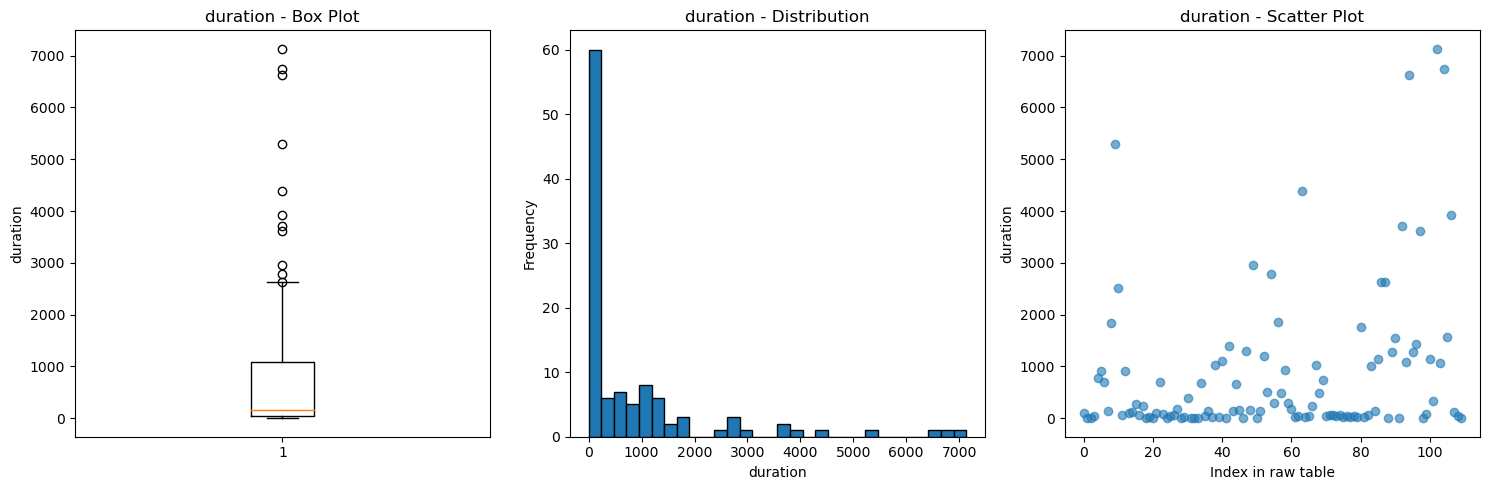

In [7]:
column_name = 'duration'
df[column_name] = df[column_name] / 60

# Visualize the data first
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df[column_name].dropna())
plt.title(f'{column_name} - Box Plot')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df[column_name], alpha=0.6)
plt.title(f'{column_name} - Scatter Plot')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()

In [8]:
# Remove outliers using IQR method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier detection:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Find outliers
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print(f"Outliers found: {outliers.sum()}")

# Remove outliers
df_clean = df[~outliers]
print(f"Data after removing outliers: {len(df_clean)} rows")
print(f"Removed {len(df) - len(df_clean)} rows ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")

# Show statistics after cleaning
print(f"\nAfter cleaning:")
print(df_clean[column_name].describe())



Outlier detection:
Q1: 40.20
Q3: 1077.61
IQR: 1037.40
Normal range: [-1515.90, 2633.71]
Outliers found: 11
Data after removing outliers: 99 rows
Removed 11 rows (10.0%)

After cleaning:
count      99.000000
mean      444.799327
std       600.409386
min         0.016667
25%        28.383333
50%       125.083333
75%       765.708333
max      2630.916667
Name: duration, dtype: float64


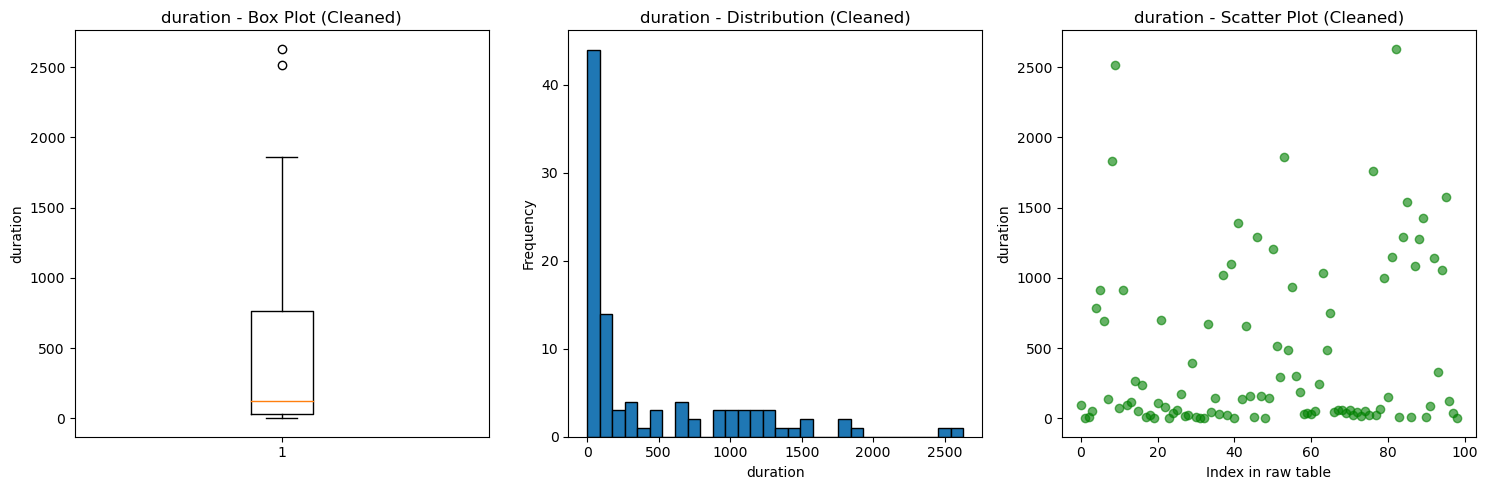

In [9]:

# Visualize cleaned data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df_clean[column_name].dropna())
plt.title(f'{column_name} - Box Plot (Cleaned)')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df_clean[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution (Cleaned)')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df_clean)), df_clean[column_name], alpha=0.6, color='green')
plt.title(f'{column_name} - Scatter Plot (Cleaned)')
plt.xlabel('Index in raw table')

plt.ylabel(column_name)

plt.tight_layout()
plt.show()


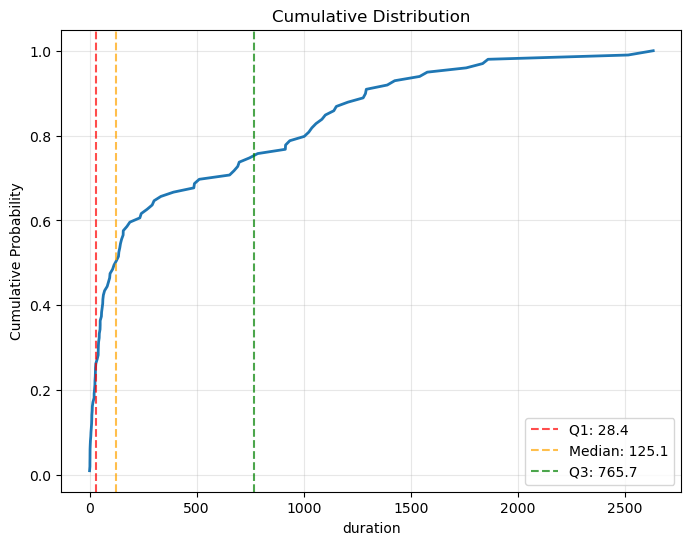

In [10]:
data_sorted = df_clean[column_name].dropna().sort_values()

plt.figure(figsize=(8, 6))
x = np.sort(data_sorted)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, linewidth=2)
plt.title('Cumulative Distribution')
plt.xlabel(column_name)
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# Add quartile lines
q25, q50, q75 = np.percentile(data_sorted, [25, 50, 75])
plt.axvline(q25, color='red', linestyle='--', alpha=0.7, label=f'Q1: {q25:.1f}')
plt.axvline(q50, color='orange', linestyle='--', alpha=0.7, label=f'Median: {q50:.1f}')
plt.axvline(q75, color='green', linestyle='--', alpha=0.7, label=f'Q3: {q75:.1f}')
plt.legend()
plt.show()

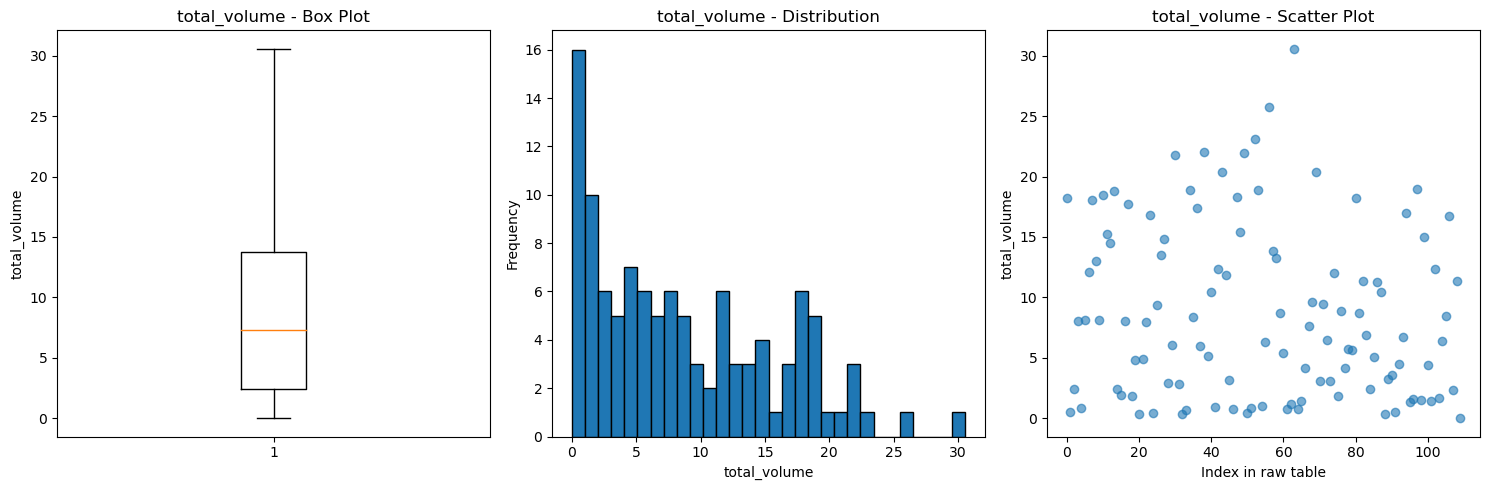

In [11]:
column_name = 'total_volume'

# Visualize the data first
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df[column_name].dropna())
plt.title(f'{column_name} - Box Plot')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df[column_name], alpha=0.6)
plt.title(f'{column_name} - Scatter Plot')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()

In [12]:

# Remove outliers using IQR method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier detection:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Find outliers
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print(f"Outliers found: {outliers.sum()}")

# Remove outliers
df_clean = df[~outliers]
print(f"Data after removing outliers: {len(df_clean)} rows")
print(f"Removed {len(df) - len(df_clean)} rows ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")

# Show statistics after cleaning
print(f"\nAfter cleaning:")
print(df_clean[column_name].describe())



Outlier detection:
Q1: 2.39
Q3: 13.76
IQR: 11.37
Normal range: [-14.66, 30.81]
Outliers found: 0
Data after removing outliers: 110 rows
Removed 0 rows (0.0%)

After cleaning:
count    110.000000
mean       8.708383
std        7.116821
min        0.001080
25%        2.392750
50%        7.271000
75%       13.760250
max       30.577000
Name: total_volume, dtype: float64


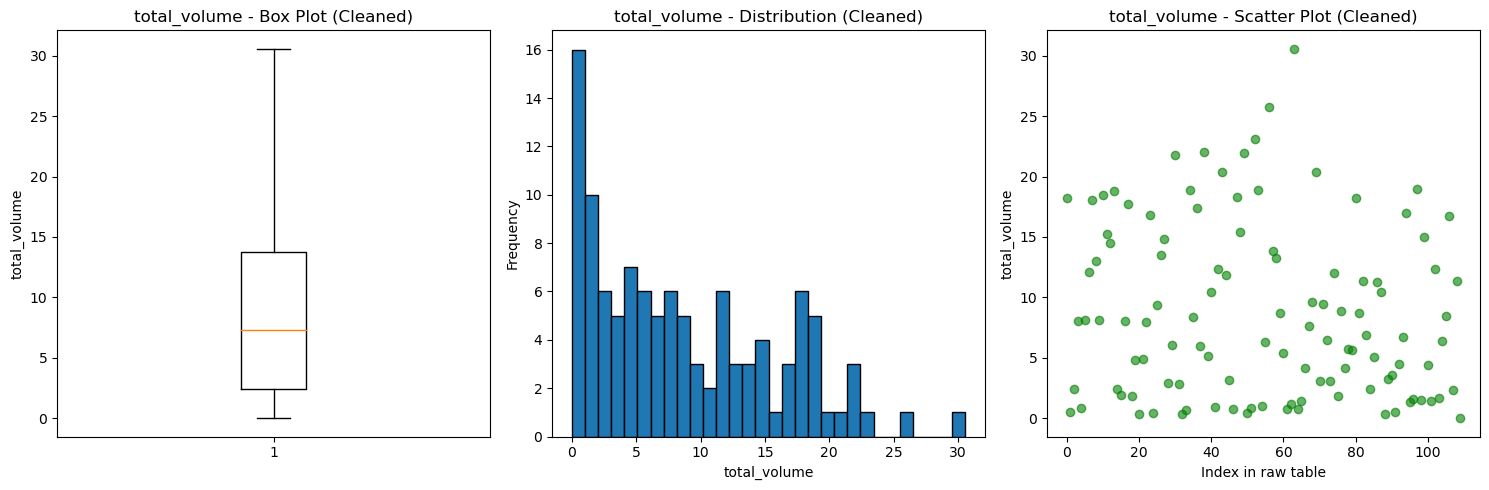

In [13]:
# Visualize cleaned data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df_clean[column_name].dropna())
plt.title(f'{column_name} - Box Plot (Cleaned)')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df_clean[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution (Cleaned)')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df_clean)), df_clean[column_name], alpha=0.6, color='green')
plt.title(f'{column_name} - Scatter Plot (Cleaned)')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()


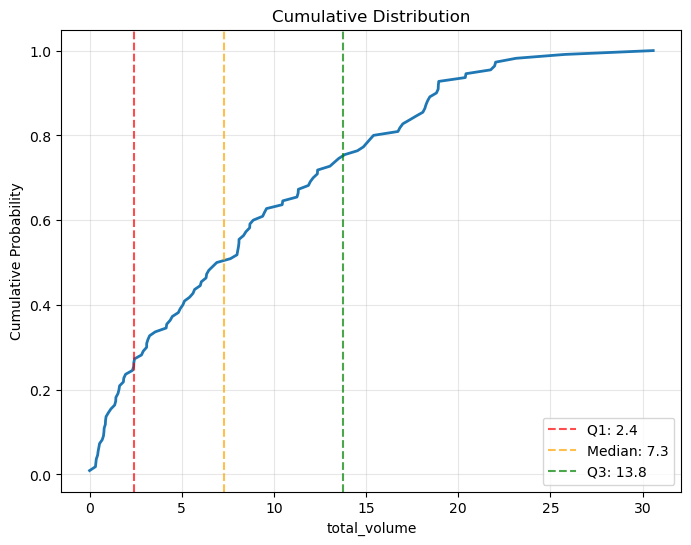

In [14]:
data_sorted = df_clean[column_name].dropna().sort_values()

plt.figure(figsize=(8, 6))
x = np.sort(data_sorted)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, linewidth=2)
plt.title('Cumulative Distribution')
plt.xlabel(column_name)
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# Add quartile lines
q25, q50, q75 = np.percentile(data_sorted, [25, 50, 75])
plt.axvline(q25, color='red', linestyle='--', alpha=0.7, label=f'Q1: {q25:.1f}')
plt.axvline(q50, color='orange', linestyle='--', alpha=0.7, label=f'Median: {q50:.1f}')
plt.axvline(q75, color='green', linestyle='--', alpha=0.7, label=f'Q3: {q75:.1f}')
plt.legend()
plt.show()

Original Dataset Overview:
Total records: 4638
Charging duration range: -6739.0 - 435295.0 minutes
Consumption range: 0.000 - 68.111 kWh

Charging Duration Outliers (IQR method):
Valid range: 0.0 - 673.5 minutes
Number of outliers: 152 (3.3%)

Consumption Outliers (IQR method):
Valid range: 0.000 - 56.661 kWh
Number of outliers: 20 (0.4%)

After removing outliers:
Remaining records: 4466 (96.3% of original)
Removed records: 172



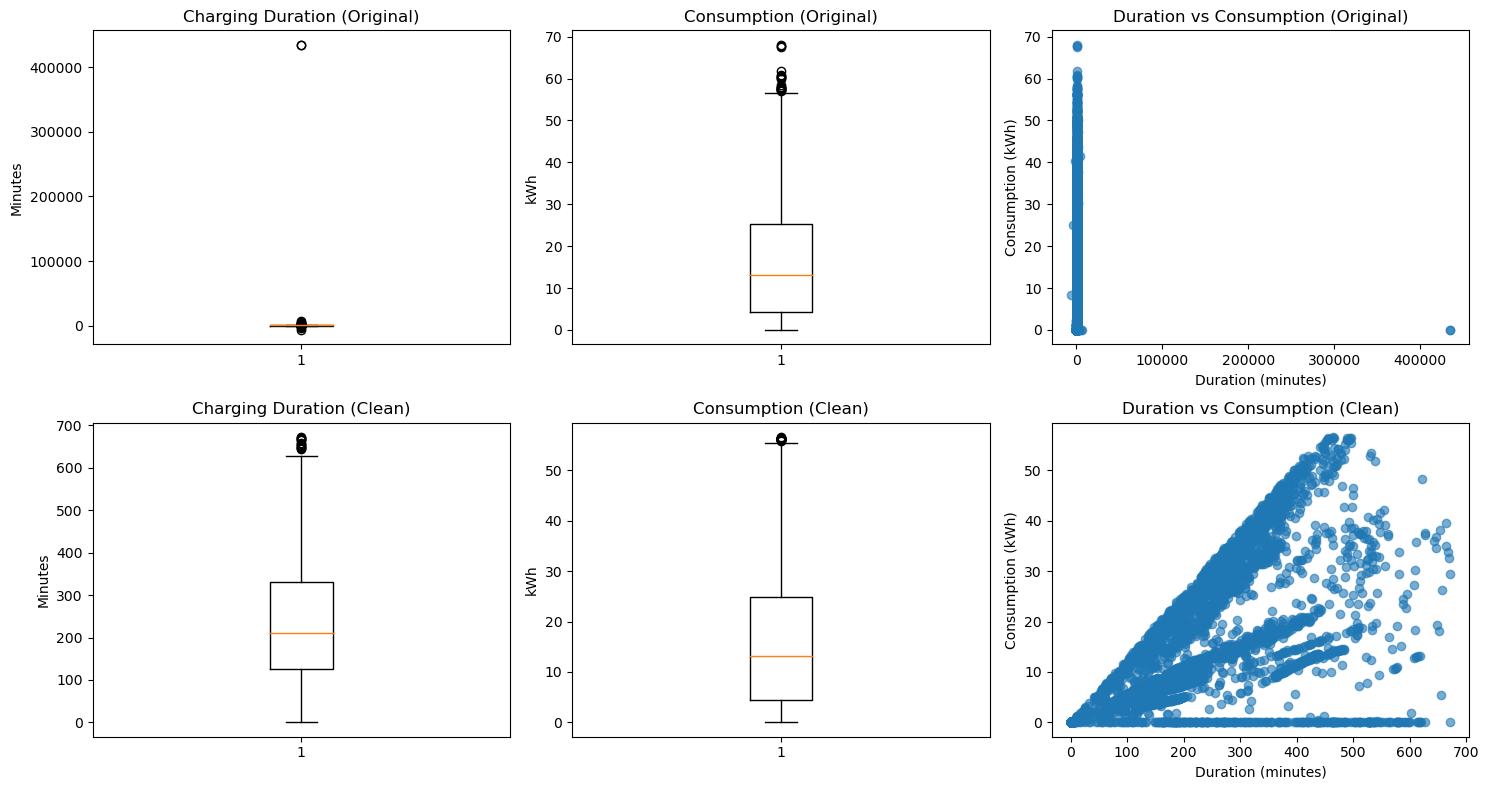

STATISTICS COMPARISON
Charging Duration Statistics:
Before outlier removal:
count      4638.000000
mean        438.307245
std        9037.233011
min       -6739.000000
25%         131.000000
50%         218.000000
75%         348.000000
max      435295.000000
Name: charging duration, dtype: float64

After outlier removal:
count    4466.000000
mean      225.974026
std       146.088060
min         0.000000
25%       127.000000
50%       210.000000
75%       330.000000
max       672.000000
Name: charging duration, dtype: float64

Consumption Statistics:
Before outlier removal:
count    4638.000000
mean       16.121039
std        14.222077
min         0.000000
25%         4.277000
50%        13.058500
75%        25.230750
max        68.111000
Name: consumption (kWh), dtype: float64

After outlier removal:
count    4466.000000
mean       15.945264
std        13.811160
min         0.000000
25%         4.481000
50%        13.068000
75%        24.814000
max        56.533000
Name: consumption (

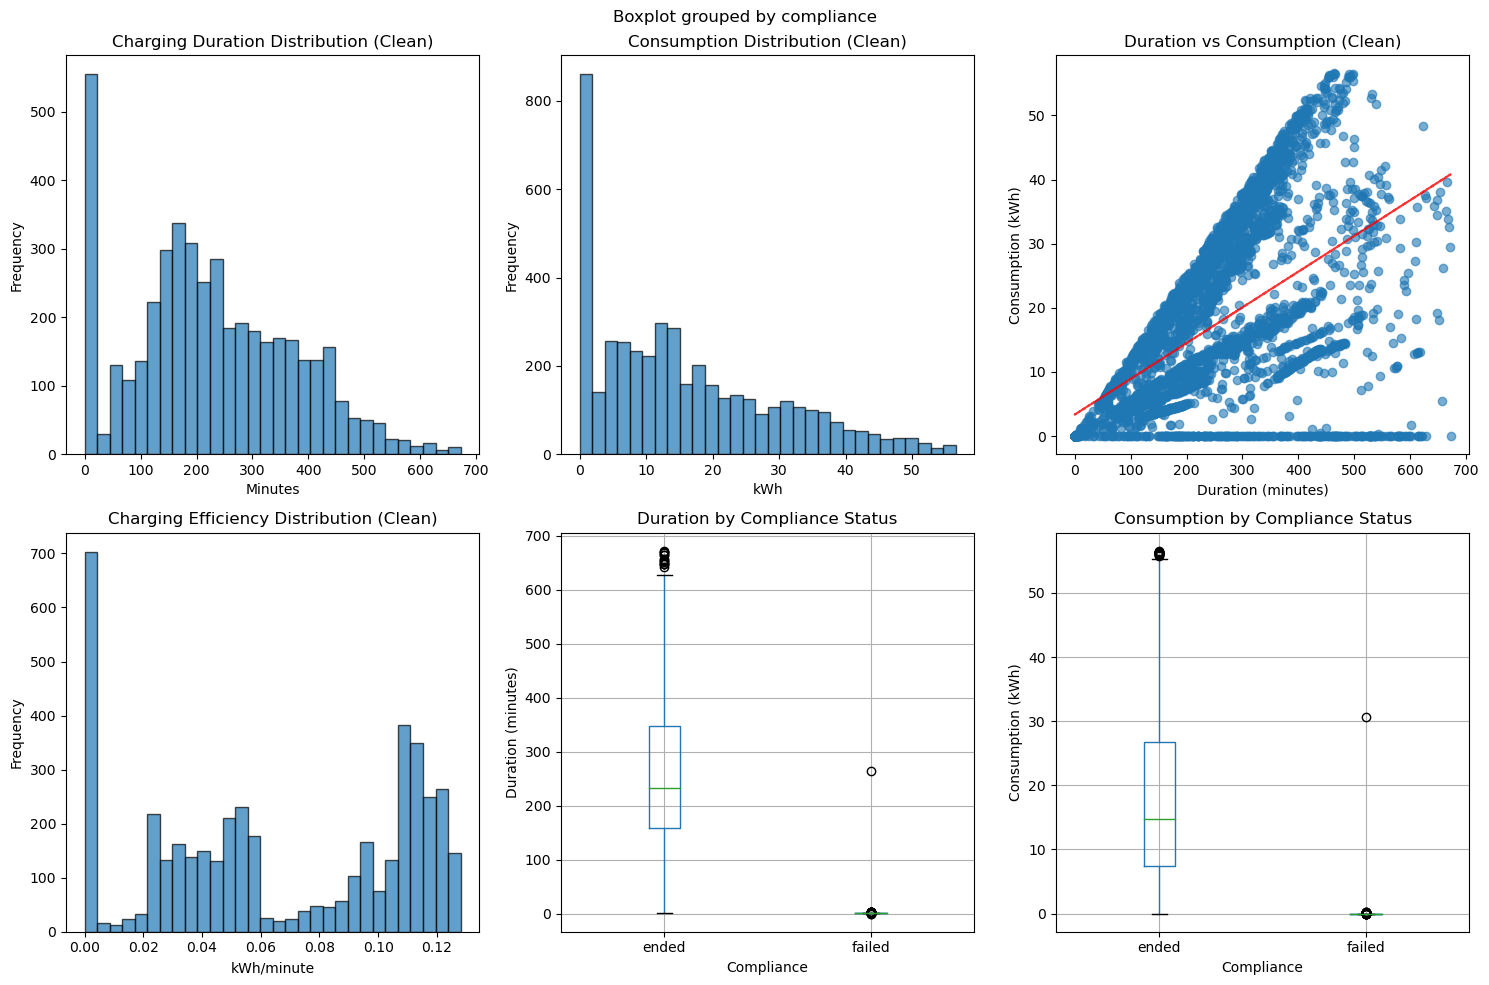

In [15]:
# Step 1: Initial data overview
print("Original Dataset Overview:")
print(f"Total records: {len(data.df_cleaned_b103)}")
print(f"Charging duration range: {data.df_cleaned_b103['charging duration'].min():.1f} - {data.df_cleaned_b103['charging duration'].max():.1f} minutes")
print(f"Consumption range: {data.df_cleaned_b103['consumption (kWh)'].min():.3f} - {data.df_cleaned_b103['consumption (kWh)'].max():.3f} kWh")
print()

# Step 2: Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for charging duration
duration_outliers, duration_lower, duration_upper = detect_outliers_iqr(data.df_cleaned_b103, 'charging duration')
print(f"Charging Duration Outliers (IQR method):")
print(f"Valid range: {duration_lower:.1f} - {duration_upper:.1f} minutes")
print(f"Number of outliers: {len(duration_outliers)} ({len(duration_outliers)/len(data.df_cleaned_b103)*100:.1f}%)")
print()

# Detect outliers for consumption
consumption_outliers, consumption_lower, consumption_upper = detect_outliers_iqr(data.df_cleaned_b103, 'consumption (kWh)')
print(f"Consumption Outliers (IQR method):")
print(f"Valid range: {consumption_lower:.3f} - {consumption_upper:.3f} kWh")
print(f"Number of outliers: {len(consumption_outliers)} ({len(consumption_outliers)/len(data.df_cleaned_b103)*100:.1f}%)")
print()

# Step 3: Visualize outliers before removal
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.boxplot(data.df_cleaned_b103['charging duration'])
plt.title('Charging Duration (Original)')
plt.ylabel('Minutes')

plt.subplot(2, 3, 2)
plt.boxplot(data.df_cleaned_b103['consumption (kWh)'])
plt.title('Consumption (Original)')
plt.ylabel('kWh')

plt.subplot(2, 3, 3)
plt.scatter(data.df_cleaned_b103['charging duration'], data.df_cleaned_b103['consumption (kWh)'], alpha=0.6)
plt.title('Duration vs Consumption (Original)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Consumption (kWh)')

# Step 4: Remove outliers
# Create clean dataset by removing outliers
df_clean = data.df_cleaned_b103[
    (data.df_cleaned_b103['charging duration'] >= duration_lower) & 
    (data.df_cleaned_b103['charging duration'] <= duration_upper) &
    (data.df_cleaned_b103['consumption (kWh)'] >= consumption_lower) & 
    (data.df_cleaned_b103['consumption (kWh)'] <= consumption_upper)
]

print(f"After removing outliers:")
print(f"Remaining records: {len(df_clean)} ({len(df_clean)/len(data.df_cleaned_b103)*100:.1f}% of original)")
print(f"Removed records: {len(data.df_cleaned_b103) - len(df_clean)}")
print()

# Step 5: Visualize data after outlier removal
plt.subplot(2, 3, 4)
plt.boxplot(df_clean['charging duration'])
plt.title('Charging Duration (Clean)')
plt.ylabel('Minutes')

plt.subplot(2, 3, 5)
plt.boxplot(df_clean['consumption (kWh)'])
plt.title('Consumption (Clean)')
plt.ylabel('kWh')

plt.subplot(2, 3, 6)
plt.scatter(df_clean['charging duration'], df_clean['consumption (kWh)'], alpha=0.6)
plt.title('Duration vs Consumption (Clean)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Consumption (kWh)')

plt.tight_layout()
plt.show()

# Step 6: Statistics comparison (before vs after)
print("=" * 60)
print("STATISTICS COMPARISON")
print("=" * 60)

print("Charging Duration Statistics:")
print("Before outlier removal:")
print(data.df_cleaned_b103['charging duration'].describe())
print("\nAfter outlier removal:")
print(df_clean['charging duration'].describe())
print()

print("Consumption Statistics:")
print("Before outlier removal:")
print(data.df_cleaned_b103['consumption (kWh)'].describe())
print("\nAfter outlier removal:")
print(df_clean['consumption (kWh)'].describe())
print()

# Step 7: Final analysis on clean data
print("=" * 60)
print("ANALYSIS ON CLEAN DATA")
print("=" * 60)

# Total statistics
total_duration_clean = df_clean['charging duration'].sum()
total_consumption_clean = df_clean['consumption (kWh)'].sum()
print(f"Total charging duration: {total_duration_clean:.1f} minutes ({total_duration_clean/60:.1f} hours)")
print(f"Total energy consumption: {total_consumption_clean:.2f} kWh")
print(f"Average charging efficiency: {total_consumption_clean/total_duration_clean:.4f} kWh/minute")
print()

# Correlation on clean data
correlation_clean = df_clean['charging duration'].corr(df_clean['consumption (kWh)'])
correlation_original = data.df_cleaned_b103['charging duration'].corr(data.df_cleaned_b103['consumption (kWh)'])
print(f"Correlation (original data): {correlation_original:.3f}")
print(f"Correlation (clean data): {correlation_clean:.3f}")
print()

# Analysis by compliance status on clean data
print("Statistics by Compliance Status (Clean Data):")
status_stats_clean = df_clean.groupby('compliance')[['charging duration', 'consumption (kWh)']].agg(['count', 'mean', 'std']).round(3)
print(status_stats_clean)

# Step 8: Create comprehensive visualization of clean data
plt.figure(figsize=(15, 10))

# Distribution plots
plt.subplot(2, 3, 1)
plt.hist(df_clean['charging duration'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Charging Duration Distribution (Clean)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(df_clean['consumption (kWh)'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Consumption Distribution (Clean)')
plt.xlabel('kWh')
plt.ylabel('Frequency')

# Scatter plot with regression line
plt.subplot(2, 3, 3)
plt.scatter(df_clean['charging duration'], df_clean['consumption (kWh)'], alpha=0.6)
z = np.polyfit(df_clean['charging duration'], df_clean['consumption (kWh)'], 1)
a, b = z  # a是斜率，b是截距
print(f"a linear function : y = {a:.4f} * x + {b:.4f}")

p = np.poly1d(z)
plt.plot(df_clean['charging duration'], p(df_clean['charging duration']), "r--", alpha=0.8)
plt.title('Duration vs Consumption (Clean)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Consumption (kWh)')

# Efficiency distribution
efficiency_clean = df_clean['consumption (kWh)'] / df_clean['charging duration']
plt.subplot(2, 3, 4)
plt.hist(efficiency_clean, bins=30, alpha=0.7, edgecolor='black')
plt.title('Charging Efficiency Distribution (Clean)')
plt.xlabel('kWh/minute')
plt.ylabel('Frequency')

# Comparison by compliance
plt.subplot(2, 3, 5)
df_clean.boxplot(column='charging duration', by='compliance', ax=plt.gca())
plt.title('Duration by Compliance Status')
plt.xlabel('Compliance')
plt.ylabel('Duration (minutes)')

plt.subplot(2, 3, 6)
df_clean.boxplot(column='consumption (kWh)', by='compliance', ax=plt.gca())
plt.title('Consumption by Compliance Status')
plt.xlabel('Compliance')
plt.ylabel('Consumption (kWh)')

plt.tight_layout()
plt.show()
